In [ ]:
import numpy as np # linear algebra
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df_fake = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CDSS/Day 5/Fake.csv', encoding ="utf8")
df_true = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CDSS/Day 5/True.csv', encoding ="utf8")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
len(df_true), len(df_fake)

(21417, 23481)

In [ ]:
df_true["label"] = 1
df_true.sample(5)

,title,text,subject,date,label
4232,Wall Street banker Cohn moving Trump toward mo...,WASHINGTON/BOSTON (Reuters) - In a White House...,politicsNews,"April 16, 2017",1
13629,U.S. State Department criticizes Cuban municip...,WASHINGTON (Reuters) - The U.S. State Departme...,worldnews,"November 28, 2017",1
299,Justice Department seeks warrant to seize anci...,WASHINGTON (Reuters) - The U.S. Justice Depart...,politicsNews,"December 6, 2017",1
11436,"Sudan, Turkey to set up 'strategic cooperation...",KHARTOUM (Reuters) - Turkey and Sudan have agr...,worldnews,"December 24, 2017",1
16618,Barnier says only off-the-peg deals open to Br...,BERLIN (Reuters) - Britain must choose from a ...,worldnews,"October 24, 2017",1


In [ ]:
df_fake["label"] = 0
df_fake.sample(5)

,title,text,subject,date,label
1600,Comey Just Laid Out The Two Reasons Putin Sup...,"Today, FBI Director James Comey sat down with ...",News,"May 3, 2017",0
16056,FAST AND FURIOUS Hearing Rips Obama and Holder...,Members of a congressional committee ripped Ob...,Government News,"Jun 9, 2017",0
4535,"Facing Tough Re-Election, Sheriff Joe Says He...",Even though Donald Trump (sort of) dropped the...,News,"September 21, 2016",0
300,BREAKING: Jared Kushner Is Really A Woman And...,You know all those times conservatives have sa...,News,"September 27, 2017",0
6464,Cruz Campaign Blames Rubio For Loss: A Cruz/R...,Now that the side-show is essentially over and...,News,"May 9, 2016",0


In [ ]:
df = pd.concat([df_true, df_fake])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


<Axes: title={'center': 'Bar Chart of Fake and Real News Data'}, xlabel='label'>

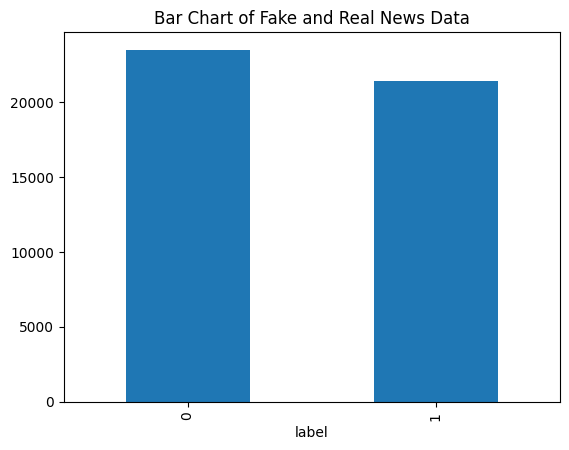

In [ ]:
df.label.value_counts().plot.bar(title = "Bar Chart of Fake and Real News Data")

In [ ]:
X = df["text"]
y = df["label"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(35918,)

In [ ]:
X_test.shape

(8980,)

In [ ]:
#cm = confusion_matrix(y_test, lr.predict(X_test))
#sns.heatmap(cm, annot=True, cmap="Purples", fmt="d")

In [ ]:
#from sklearn.metrics import classification_report

#print(classification_report(y_test,lr.predict(X_test_vectorized1)))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data
news = TfidfVectorizer(min_df=5).fit(X_train)
X_train_vectorized = news.fit_transform(X_train)

In [ ]:
len(news.get_feature_names_out())

36518

In [ ]:
X_test_vectorized = news.transform(X_test)
X_test_vectorized.shape

(8980, 36518)

In [ ]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Evaluate the model on the test data
accuracy = model.score(X_test_vectorized, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9875278396436525


In [ ]:
from sklearn.metrics import roc_auc_score

predictions = model.predict(news.transform(X_test))
y_proba = model.predict_proba(news.transform(X_test))

print('AUC: ', roc_auc_score(y_test, y_proba[:,1]))

AUC:  0.9981173209060152


In [ ]:
model.predict(news.transform(['The Trump administration has offered the job of White House national security adviser, vacated by former U. S. intelligence official Michael Flynn, to Vice Admiral Robert Harward, said two U. S. officials familiar with the matter on Wednesday. [It was not immediately clear if Harward, a former deputy commander of U. S. Central Command who has Navy SEAL combat experience, had accepted the offer, according to sources.  A White House spokesperson had no immediate comment. Flynn resigned on Monday after revelations that he had discussed U. S. sanctions on Russia with the Russian ambassador to the United States before President Donald Trump took office.']))

array([1])

In [ ]:
model.coef_

array([[-0.4839258 , -0.2579642 ,  0.06791284, ...,  0.47318445,
         0.02759122, -0.01574041]])

In [ ]:
model.coef_[0].argsort()

array([35000, 34681, 32910, ..., 23271, 28689, 27899])

In [ ]:
# get the feature names as numpy array
feature_names = np.array(news.get_feature_names_out())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
print('Smallest Coefs:' )
print(feature_names[sorted_coef_index[  :10]])

print('\n Largest Coefs:')   #\n is for line space
print(feature_names[sorted_coef_index[  :-11:-1]]) #select last 10 values

Smallest Coefs:
['via' 'us' 'this' 'read' 'just' 'gop' 'mr' 'is' 'that' 'image']

 Largest Coefs:
['reuters' 'said' 'on' 'washington' 'in' 'republican' 'wednesday'
 'thursday' 'tuesday' 'minister']


In [ ]:
news2 = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized2 = news2.transform(X_train)

In [ ]:
len(news2.get_feature_names_out())

359140

In [ ]:
X_test_vectorized2 = news2.transform(X_test)
X_test_vectorized2.shape

(8980, 359140)

In [ ]:
model = LogisticRegression()
model.fit(X_train_vectorized2, y_train)

# Evaluate the model on the test data
accuracy = model.score(X_test_vectorized2, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9972160356347439


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model = LogisticRegression()
model.fit(X_train_vectorized2, y_train)

predictions = model.predict(news2.transform(X_test))
y_proba = model.predict_proba(news2.transform(X_test))

print('AUC: ', roc_auc_score(y_test, y_proba[:,1]))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC:  0.9990870293178058


In [ ]:
feature_names = np.array(news2.get_feature_names_out())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:' )
print(feature_names[sorted_coef_index[:10]])

print('\n Largest Coefs:')
print(feature_names[sorted_coef_index[:-11:-1]])

Smallest Coefs:
['via' 'read more' 'us' 'watch' 'just' 'read' 'president trump' 'com'
 'via reuters' 'this']

 Largest Coefs:
['reuters' 'washington reuters' 'reuters the' 'said on' 'on wednesday'
 'reuters president' 'said' 'on thursday' 'on friday' 'president donald']


In [ ]:
print(model.predict(news2.transform(['PALO ALTO, Calif.  â€”   After years of scorning the political process, Silicon Valley has leapt into the fray. The prospect of a President Donald J. Trump is pushing the tech community to move beyond its traditional role as donors and to embrace a new existence as agitators and activists. A distinguished venture capital firm emblazoned on its corporate home page an earthy   epithet. One prominent tech chieftain says the consequences of Mr. Trumpâ€™s election would â€œrange between disastrous and terrible. â€ Another compares him to a dictator. And nearly 150 tech leaders signed an open letter decrying Mr. Trump and his campaign of â€œangerâ€ and â€œbigotry. â€ Not quite all the action is  . Peter Thiel, a founder of PayPal and Palantir who was the first outside investor in Facebook, spoke at the Republican convention in July. The New York Times reported on Saturday that Mr. Thiel is giving $1. 25 million to support Mr. Trumpâ€™s candidacy even as other supporters flee. (He also recently gave $1 million to a â€œsuper PACâ€ that supports Senator Rob Portman, the Republican freshman running for   in Ohio.) Getting involved in politics used to be seen as clashing with Silicon Valleyâ€™s value system: You transform the world by making problems obsolete, not solving them through Washington. Nor did entrepreneurs want to alienate whatever segment of customers did not agree with them politically. Such reticence is no longer in style here. â€œWeâ€™re a bunch of nerds not used to having a lot of limelight,â€ said Dave McClure, an investor who runs a tech incubator called 500 Startups. â€œBut to quote   â€˜With great power comes great responsibility. â€™â€ Mr. McClure grew worried after the Republican and Democratic conventions as Mr. Trump began to catch up to Hillary Clinton in the polls. He wanted Silicon Valley to do more, and so late last month he announced Nerdz4Hillary, an informal   effort. An initial group of donors pledged $50, 000 the goal was to ask the â€œnerdzâ€ for small donations to match that sum. They have not come through yet. â€œWeâ€™re kind of optimistic weâ€™ll get the other $50, 000 in a few weeks,â€ Mr. McClure said. That relatively slow pace reflects Silicon Valleyâ€™s shifting position: Even as it becomes increasingly free with its opinions, it has been less free with its checkbook. The most recent data, from late August, shows Mrs. Clinton taking in $7. 7 million from the tech community, according to Crowdpac, a   that tracks donations. By that point in 2012, Crowdpac says, President Obama had raised $21 million from entrepreneurs and venture capitalists. Reid Hoffman, the billionaire   of the business networking site LinkedIn, offers a snapshot of Silicon Valleyâ€™s evolving approach to politics. Mr. Hoffman was a top Obama donor, giving $1 million to the Priorities USA political action committee, something several of his peers did as well. Last month, Mr. Hoffman garnered worldwide publicity for saying he would donate up to $5 million to veteransâ€™ groups if Mr. Trump released his taxes, a remote possibility that never came to pass. He has castigated Mr. Trump in interviews, saying he was speaking for those who were afraid. Mr. Hoffmanâ€™s outright donations, however, have been smaller this election cycle. In May, he gave $400, 000 to the Hillary Victory Fund. Asked if there was more recent giving that had not shown up in federal election records, Mr. Hoffman cryptically responded in an email, â€œLooking at some PACs, etc. â€ He declined several opportunities to elaborate. Even as Priorities USA has raised $133 million this election cycle, far exceeding its total in 2012, its tech contributions have dwindled. The only familiar tech name this time around is John Doerr of the venture capital firm Kleiner Perkins Caufield  Byers, who gave $500, 000. The AOL   Steve Case said his September endorsement of Mrs. Clinton, via an   in The Washington Post, was the first time he ever publicly declared for a candidate. â€œI always focused on policy and avoided politics,â€ he said. â€œBut if Trump were elected president, I would be disappointed in myself for not acting. â€ When he wrote the   he was uncertain about donating money to Mrs. Clinton, saying only that it was â€œprobable. â€ A spokeswoman said Sunday that Mr. Case gave $25, 000 to the Hillary Victory Fund. Mason Harrison, Crowdpacâ€™s head of communications, offered a possible reason for Mrs. Clintonâ€™s    support. â€œDonors give to support candidates they love, not to defeat candidates they fear,â€ he said. A few billionaires are acting instead of talking. Dustin Moskovitz, a founder of Facebook, said he was giving $20 million to various Democratic election efforts  â€”   the first time he and his wife, Cari Tuna, have endorsed a candidate. He declined to be interviewed. Part of the problem for Mrs. Clinton is that, however preferable she may be to Mr. Trump in the tech community, she pales in comparison to President Obama. After some initial misgivings, Silicon Valley found its champion in him. There has been a revolving door between tech and the Obama administration, just as previous Democratic administrations had a revolving door with Wall Street. In June, President Obama seemed to suggest that he might become a venture capitalist after his term ends. Mrs. Clinton is not as enthusiastic toward Silicon Valley and its disruptive ways. In a speech in the summer of 2015, she noted that   in the â€œ  or   gig economyâ€  â€”   Uber, Airbnb and their ilk  â€”   were â€œunleashing innovationâ€ but also â€œraising hard questions about workplace protection and what a good job will look like in the future. â€ The Clinton campaign declined to comment. The Trump campaign did not respond to a query. Even as Silicon Valley works against Mr. Trump, there is quiet acknowledgment that his campaign has bared some important issues. In an endorsement this month of Mrs. Clinton, the venture capital firm Union Square Ventures pointed out that â€œthe benefits of technology and globalization have not been evenly distributed,â€ and that this needed to change. If Silicon Valleyâ€™s political involvement outlasts this unusual election, the tech community may start contributing more to the process than commentary and cash. â€œNot only are tech people going to be wielding influence, but theyâ€™re going to be the candidate,â€ Mr. McClure said. â€œReid Hoffman, Sheryl Sandbergâ€  â€”   the chief operating officer of Facebook  â€”   â€œand a bunch of other folks here have political aspirations. â€ Others may be inspired to enter politics through other doors. Palmer Luckey is the    founder of the Oculus virtual reality company, which he sold to Facebook for $2 billion. Mr. Luckey donated $10, 000 to a group dedicated to spreading    messages about Mrs. Clinton both online and off. The groupâ€™s first billboard, said to be outside Pittsburgh, labeled her â€œToo Big to Jail. â€ Mr. Luckey told The Daily Beast that his thinking â€œwent along the lines of, â€˜Hey, I have a bunch of money. I would love to see more of this stuff. â€™â€ He added, â€œI thought it sounded like a real jolly good time. â€ Many virtual reality developers were less happy, and Mr. Luckey quickly posted his regrets on Facebook. He declined to comment further. â€œIf weâ€™re going to be more vocal, weâ€™ll have to live more transparently,â€ said Hunter Walk, a venture capitalist whose campaign to persuade tech companies to give workers Election Day off signed up nearly 300 firms, including Spotify, SurveyMonkey and TaskRabbit. â€œThere will be a period of adjustment. â€ But perhaps being vocal is a temporary condition after all. The venture firm CRV was in the spotlight at the end of August with its blunt   message, which included the earthy epithet. A few weeks later, it cleaned up its website. The partners went from employing a publicist to seek out attention to declining interviews. â€œWe reached everyone we wanted to reach, and hopefully influenced opinions,â€ said Saar Gur, a CRV venture capitalist. â€œThen the buzz died down and we went back to our day jobs, which are super busy. â€'])))

[0]


In [ ]:
model.predict(news2.transform(['donald trump is convicted, as reported recently']))

array([0])

In [ ]:
model.predict(news2.transform(['donald trump is convicted, as reported by reuters']))

array([1])

<Axes: >

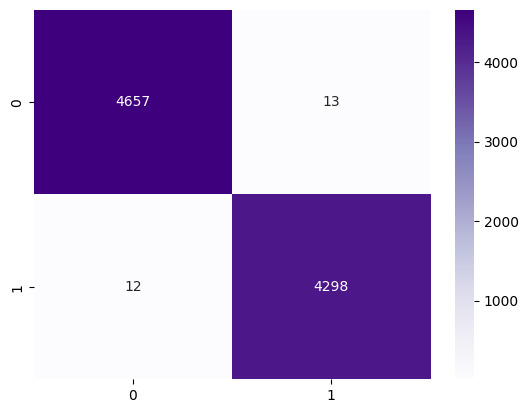

In [ ]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, cmap="Purples", fmt="d")

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4670
           1       1.00      1.00      1.00      4310

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [68]:
print(model.predict(news2.transform(['Donald Trumo si convicted via Azami','Donald Trumo si convicted via reuters','Donald Trumo si convicted by reuters'])))

[0 0 1]
